# PSYC 193: Perception and Computation 
## Lab 2: Measuring similarity between feature representations of images

In this lab, we will continue working with an image dataset used in a recent computer vision paper by [Sangkloy et al.](https://dl.acm.org/doi/abs/10.1145/2897824.2925954). 

**Learning objectives**
* Feature representations of images
* Measuring similarity between feature representations

**Submission instructions**
1. Please rename the notebook by replacing `YOURUSERNAME` in the filename with your actual UCSD AD username. 
2. Before submitting your assignment, sure that your notebook can run from "top to bottom," executing the code in every code cell without returning fatal errors. An easy way to verify this is to click "Kernel" above in the tool bar, and try selecting "Restart & Run All."
3. Once you have verified that your notebook can run "top to bottom" without issues, click "File" in the toolbar above, then "Download as," then "PDF via LaTeX" to download a PDF version of your notebook. 
4. Upload this PDF version of your notebook to Canvas before 5pm the next class period. 

### setup

In [1]:
## load generally useful python modules
import os
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import seaborn as sns

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize, getfigs
%matplotlib inline

### load in dataset

In [2]:
## import image metadata (from Sangkloy et al. (2016))
from photodraw32_metadata import metadata
M = pd.DataFrame(metadata)

In [3]:
M.head()

,category,index,sketchy_preprocessing_mode,sketchy_filepath,sketchy_filename,photodraw32_filename,s3_filename,s3_url,batch_num
0,airplane,00,tx_000100000000,photodraw32_stims\airplane\n02691156_359.png,n02691156_359.png,airplane_00,n02691156_359_airplane_00.png,https://photodraw32.s3.amazonaws.com/n02691156...,5
1,airplane,01,tx_000100000000,photodraw32_stims\airplane\n02691156_507.png,n02691156_507.png,airplane_01,n02691156_507_airplane_01.png,https://photodraw32.s3.amazonaws.com/n02691156...,4
2,airplane,02,tx_000100000000,photodraw32_stims\airplane\n02691156_573.png,n02691156_573.png,airplane_02,n02691156_573_airplane_02.png,https://photodraw32.s3.amazonaws.com/n02691156...,0
3,airplane,03,tx_000100000000,photodraw32_stims\airplane\n02691156_987.png,n02691156_987.png,airplane_03,n02691156_987_airplane_03.png,https://photodraw32.s3.amazonaws.com/n02691156...,3
4,airplane,04,tx_000100000000,photodraw32_stims\airplane\n02691156_1692.png,n02691156_1692.png,airplane_04,n02691156_1692_airplane_04.png,https://photodraw32.s3.amazonaws.com/n02691156...,0


### load and display a sample image

**Here is sample code to display one of the "airplane" images in the dataset**

Example Image URL: https://photodraw32.s3.amazonaws.com/n02691156_359_airplane_00.png


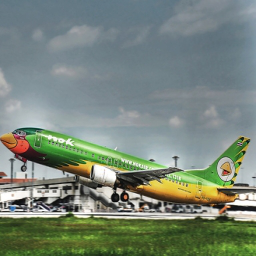

In [4]:
url = M['s3_url'].values[0] 
print('Example Image URL: {}'.format(url))
response = requests.get(url)
img1 = Image.open(BytesIO(response.content))
img1

#### Here is a function that accepts any image URL as input and returns the corresponding PIL Image as output

In [5]:
def get_image_from_url(url):
    '''
    input: 
        url = full image URL, str
    output:
        img = PIL Image
    '''
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

#### Now let's try it out on the next image in the dataset

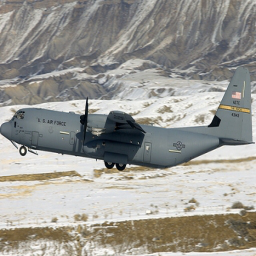

In [6]:
img2 = get_image_from_url(M['s3_url'].values[1])
img2

#### Now let's try it out on a random URL in the dataset

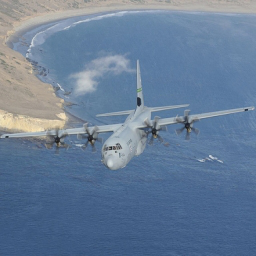

In [7]:
random_url = M[M['category']=='airplane'].sample(n=1, random_state=0)['s3_url'].values[0]
img3 = get_image_from_url(random_url)
img3

### Practice with image processing

**What are the dimensions of the example airplane images from above (i.e., width x height x num_channels)?**

In [8]:
img1.size

(256, 256)

Since we will be doing some arithmetic with the pixel values in these images, let's make them a little bit easier to work with by making them a little bit smaller. 

To change the size of an image, otherwise known as *rescaling*, use the `resize` function from PIL. It's generally a good idea to also pass the `Image.ANTIALIAS` option to this function. In computer graphics, anti-aliasing improves the appearance of "jagged" polygon edges, so they are smoothed out on the screen. To learn more about anti-aliasing, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Spatial_anti-aliasing).

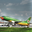

In [9]:
## Suppose we wanted images to be 32 px x 32 px
target_imsize = 32

## We can use the resize function from PIL to resize img1
img1_32 = img1.resize((target_imsize, target_imsize), Image.ANTIALIAS)
img1_32

#### Now write a function called `resize_to_dims` that will resize any image to a given target size. 

hint: This function should take two arguments: a PIL image and target image size (assuming width and height are equal)

tip: You can supply a keyword argument to this function that takes a default value. Giving it a default value means that you can leave it out when you later call this function, and it will substitute in the default value when the function is executed. If you want to override the default value, just supply the value you want it to be when you call the function. 

In [10]:
def resize_to_dims(im, resize_to=32):
    '''
    input: im = image, str
    output: resized image
    '''
    ## INSERT YOUR CODE HERE ##

    img = im.resize((resize_to, resize_to), Image.ANTIALIAS)
    return img

#### Apply this function to `img2` and `img3` to obtain smaller versions of them called `img2_32` and `img3_32`

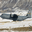

In [11]:
## INSERT YOUR CODE HERE ##
img2_32 = resize_to_dims(img2, resize_to = 32)
img2_32

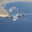

In [12]:
img3_32 = resize_to_dims(img3, resize_to = 32)
img3_32

**Again, to make our lives easier, let's work with grayscale versions of these images rather than RGB ones.**

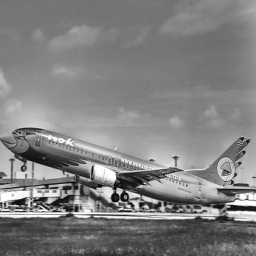

In [13]:
## An example of how to convert an RGB image to a grayscale one
img1_gray = img1.convert('L')
img1_gray

**Now create grayscale versions of our 32x32 airplane images, using variable names following this convention: `img1_32_gray`.** 

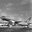

In [14]:
## INSERT YOUR CODE HERE ##
img1_32_gray = img1_32.convert("L")
img1_32_gray

#### Let's take a look at the first two example airplane images side by side

Text(0.5, 1.0, 'airplane 2')

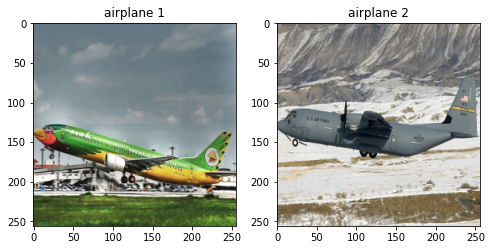

In [15]:
## display img1 and img2 side by side
fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(img1)
plt.title('airplane 1')
plt.subplot(122)
plt.imshow(img2)
plt.title('airplane 2')

**If you want to quantify how similar these images are to one another, and you are constrained to determine this similarity by doing mathematical operations on these two images written in code, what are some ways you might go about doing this?**

One straightforward (albeit naive) option is to directly compare the pixel values in each image to one another. For example, you might take each pixel value in one image and compute the size of the difference between it and the corresponding pixel value in the same location in the other image. Then you could add up all of these (absolute) differences to get a summary of how different the pixel values are in these two images, overall.

![illustrative_graphic](https://psyc193.s3-us-west-1.amazonaws.com/nneg.jpeg)

Here is an example of how to convert these images to NumPy arrays and do some arithmetic with them. Notice that we convert the data type of the underlying pixel value representation from `uint8` (unsigned integer)
to `float64`. To read more about data types in Python, check [this resource](https://numpy.org/doc/stable/user/basics.types.html) out.

In [16]:
img1_arr = np.array(img1_32_gray).astype(np.float64)

Now do the same thing with the other two images.

In [19]:
## INSERT YOUR CODE HERE ##

# converting the other 2 images to greyscale 
img2_32_gray = img2_32.convert("L")
img3_32_gray = img3_32.convert("L")

In [20]:
img2_arr = np.array(img2_32_gray).astype(np.float64)
img3_arr = np.array(img3_32_gray).astype(np.float64)

Notice that the pixel-wise difference between two images is still an image. Try calculating both the _raw_ difference between the first two images, as well as the _absolute_ difference between them, and visualize both using the `plt.matshow()` function, which will generate a heatmap. Try also using the `plt.colorbar()` function so you can interpret the values that the colors represent. 

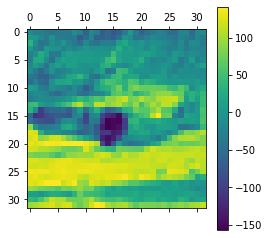

In [23]:
## MODIFY THIS CELL ##
rawdiff = img2_arr - img3_arr
plt.matshow(rawdiff)
plt.colorbar()

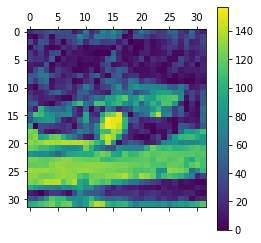

In [24]:
## MODIFY THIS CELL ##
absdiff = abs(rawdiff)
plt.matshow(absdiff)
plt.colorbar()

Now calculate the summed absolute deviation between the grayscale, 32x32 versions of `img1` and `img2`.

In [25]:
np.sum(absdiff)

57069.0

**What are some limitations of this particular approach for quantifying the (dis)similarity between images?**

_INSERT YOUR OWN RESPONSE HERE_

### Common similarity metrics for image feature representations

**A similarity metric takes two images and returns a number measuring their similarity.**

In this lab we are using perhaps the simplest kind of "feature" representation for images, the raw pixel values constituting the image itself. Next lab we will work with higher-level feature representations — in particular, those extracted by modern convolutional neural networks. For now, we can explore the key concepts involving the computation of image similarity using pixel representations, because these can be straightforwardly extended to higher-level feature representations. 

Two of the most popular similarity metrics used in computer vision and cognitive science are: **Euclidean distance** and **cosine similarity**. 

#### Euclidean distance

The larger the euclidean distance, the _less_ two images are considered to be similar. This is most analogous to our familiar sense of "distance" when applied to two locations in space.

$d(p,q)=\sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + (q_3-p_3)^2}$

#### Cosine similarity

The larger the cosine similarity, the _more_ two images are considered to be similar. The resulting similarity ranges from −1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality, while in-between values indicate intermediate similarity or dissimilarity.

$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$

Computing cosine similarity relies on computing a dot product. Here's a refresher on [dot products](https://en.wikipedia.org/wiki/Dot_product).

#### Converting 2D image representations to vectors

Although working with 2D images has advantages because we can visualize them directly as images, it is often easier to do math with *vector* representations of these images. Try converting each of the images above into vectors using the `flatten()` function from NumPy. 

#### Using only NumPy functions,  compute the euclidean distance between the first two airplane images (using their pixel representation).

In [29]:
## INSERT YOUR CODE HERE ##
img1_flat = img1_arr.flatten()
img2_flat = img2_arr.flatten()
euc_dist = np.linalg.norm(img2_flat - img1_flat)
euc_dist

2066.9828252793973

#### Using only NumPy functions,  compute the cosine similarity between the first two airplane images (using their pixel representation).

In [ ]:
## INSERT YOUR CODE HERE ##

In [34]:
from numpy.linalg import norm
cos_sim = np.dot(img1_flat, img2_flat)/(norm(img1_flat)*norm(img2_flat))
cos_sim

0.9190939872646907

## Showstopper! 

### How well do these metrics agree with one another, across images? 

To get at this question, try making a scatter plot where the horizontal axis represents the euclidean distance, the vertical axis represents cosine similarity, and each dot represents a pair of images. Generate a plot where all 32 airplane images in the `M` dataframe appear.